## Student Pefformance Indicator

### Life Cycle of Machine Learning Project



* Understanding the Problem Statement 
* Data Collection and Preparation
* Data Checks to Perform
* Exploratory Data Analysis
* Data Pre-Processing
* Model Training
* Choose Best Model

### 1) Problem Statement

* This project understands how the student's performance is affected by other factors such as Gender,Ethnicity,Parental level of Education. Lunch and Test preparation course

### 2) Data Collection

* Data Scource - kaggle datasets download -d spscientist/students-performance-in-exams

### 2.1 Import Data and Required Packages 

Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library

In [2]:
import pandas as pd
import numbers as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
pwd

'/home/surani/Downloads/ML_PROJECTS/src/notebook'

In [4]:
df = pd.read_csv('data/stud.csv')

In [5]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Data Checks to perform

* Check Missing Values
* Check Duplicates
* Check Data Types
* Check Unique Values in each column 
* Check statistics of data set 
* Check various categories present in the different categorical column 

In [10]:
#Check Missiing Value
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [12]:
# Check duplicate values

df.duplicated().sum()

0

In [13]:
# Check statistics of data set

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
# check data types 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
# Number of unique values in each column

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## Exploring data

In [17]:
print("Categories in 'Gender' variable : ",end=" ")
print(df["gender"].nunique())


print("Categories in Rate/Ethnicity variable : ",end=" ")
print(df["race_ethnicity"].nunique())

print("Categories in Parental Level of Education variable : ",end=" ")
print(df["parental_level_of_education"].nunique())

print("Categories in Lunch variable : ",end=" ")
print(df["lunch"].nunique())

print("Categories in Test Preparation Course variable : ",end=" ")
print(df["test_preparation_course"].nunique())

Categories in 'Gender' variable :  2
Categories in Rate/Ethnicity variable :  5
Categories in Parental Level of Education variable :  6
Categories in Lunch variable :  2
Categories in Test Preparation Course variable :  2


In [24]:
# Define Numerical and Category variables

numerical_features =[ feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features =[feature for feature in df.columns if df[feature].dtype == "O"]

# print column names


print("We have {} numerical features {} :".format(len(numerical_features), numerical_features))

print("We have {} categorical features {} :".format(len(categorical_features), categorical_features))

We have 3 numerical features ['math_score', 'reading_score', 'writing_score'] :
We have 5 categorical features ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] :


## Adding columns for total score and Average



In [25]:
df["total_score"] =df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = df["total_score"] / 3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
reading_full = df[df["reading_score"]==100]["average_score"].count()
math_full = df[df["math_score"]==100]["average_score"].count()
writing_full = df[df["writing_score"]==100]["average_score"].count()

print(f"No of Students with full marks in Maths: {math_full}")
print(f"No of Students with full marks in Reading: {reading_full}")
print(f"No of Students with full marks in Writing: {writing_full}")

No of Students with full marks in Maths: 7
No of Students with full marks in Reading: 17
No of Students with full marks in Writing: 14


In [29]:
reading_less_20 = df[df["reading_score"] <= 20]["average_score"].count()
math_less_20 = df[df["math_score"] <= 20]["average_score"].count()
writing_less_20 = df[df["writing_score"] <= 20]["average_score"].count()

print(f"No of Students with less than 20 marks in Maths: {math_less_20}")
print(f"No of Students with less than 20 marks in Reading: {reading_less_20}")
print(f"No of Students with less than 20 marks in Writing: {writing_less_20}")

No of Students with less than 20 marks in Maths: 4
No of Students with less than 20 marks in Reading: 1
No of Students with less than 20 marks in Writing: 3


## Insights

* Students with full marks in Maths are more than those with less than 20 marks.
* Students with full marks in Reading are more than those with less than 20 marks.
* Students with full marks in Writing are more than those with less than 20 marks.



## Exploring Data (Vizualization)

### Vizualize average score distribution to make some conclusions

* Histogram
* Kernal Density Function(KDE)

### Histogram and KDE  

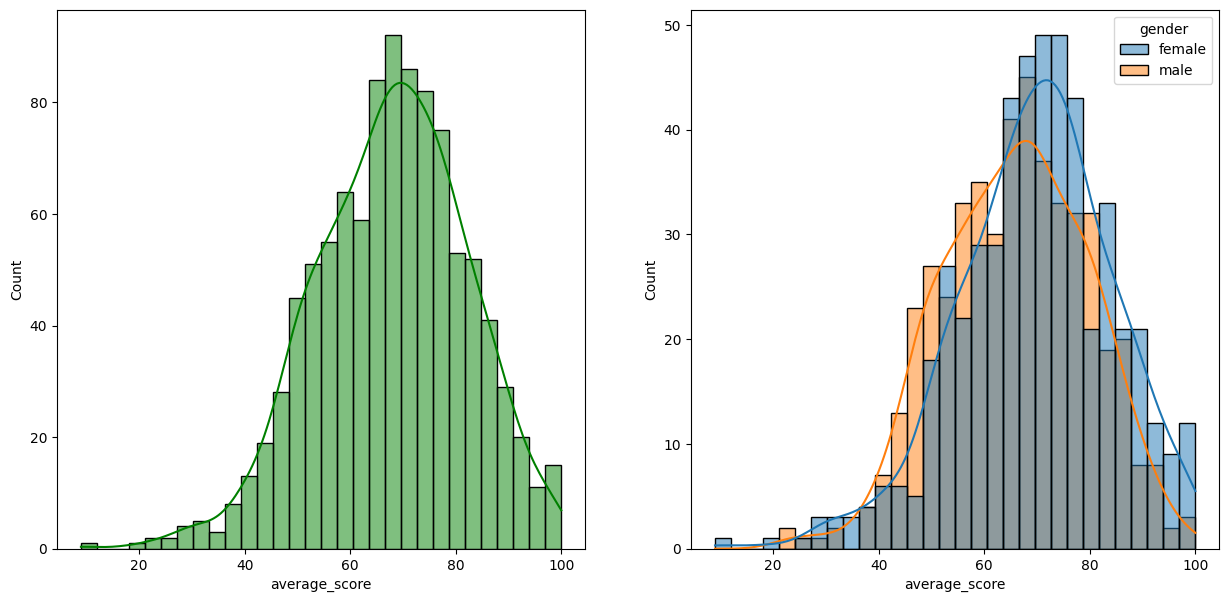

In [37]:
fig,axis= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average_score",bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average_score",bins=30,kde=True,hue='gender')
plt.show()

### Insights

* Female students tend to perform well than male students

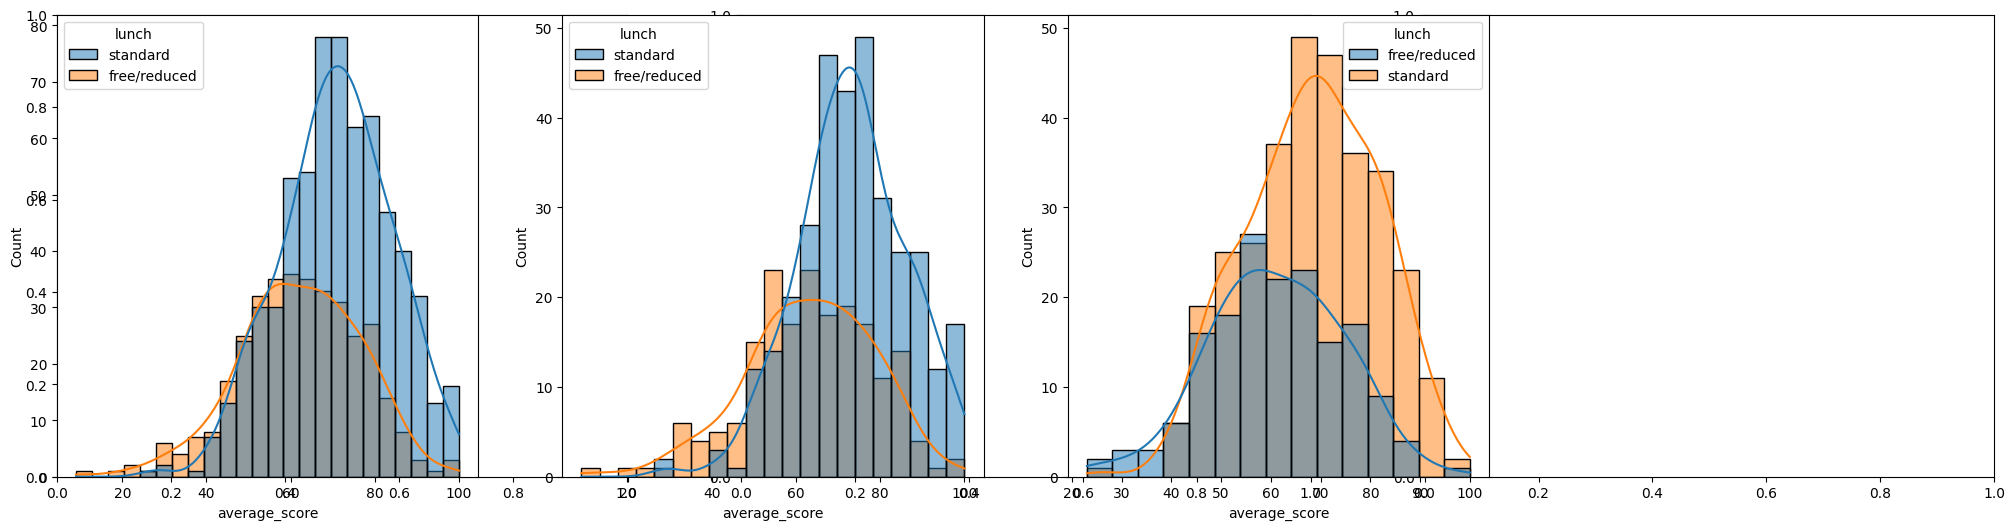

In [41]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender =='male'],x='average_score',kde=True,hue='lunch')
plt.show()